## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata, study_results

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata,study_results ,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
combined_results_df["Mouse ID"].nunique()


249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID = combined_results_df["Mouse ID"]
timepoint = combined_results_df["Timepoint"]

mice_timepoint_df = pd.DataFrame({"Mice ID": mouse_ID,
                              "Timepoint": timepoint
                               })
mice_timepoint_df

,Mice ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_rows_df = mice_timepoint_df[mice_timepoint_df.duplicated()]
duplicated_rows_df

,Mice ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# say_no_to_dupes = combined_results_df.drop_duplicates(subset=['Mouse ID'])
combined_results_df = combined_results_df[combined_results_df["Mouse ID"] != 'g989' ]


In [20]:
# Checking the number of mice in the clean DataFrame.
combined_results_df["Mouse ID"].nunique()

248

## Summary Statistics

In [21]:
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume_summary = pd.DataFrame(combined_results_df.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"])
tumor_volume_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

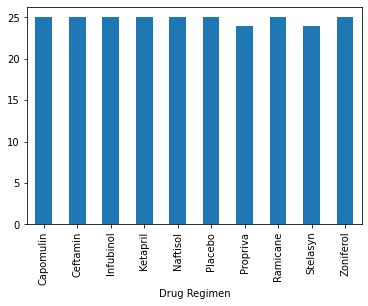

In [42]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# mice_tested = combined_results_df.groupby(["Drug Regimen"]).nunique()
mice_tested = combined_results_df.groupby(["Drug Regimen"]).nunique()
num_mice_tested = mice_tested["Mouse ID"]
num_mice_tested

num_mice_tested.plot.bar()
plt.show()

# num_mice_tested.plot.bar(x='Drug Regimen', y='val', rot=90)
# num_mice_tested
# x_axis = np.arange(len(num_mice_tested))
# tick_locations = [value+0.4 for value in x_axis]
# tick_locations = [value for value in x_axis]
# df.set_index("name",drop=True,inplace=True)
# plt.bar(x_axis, num_mice_tested, alpha=0.5, align="center")
# plt.xticks(tick_locations, mice_tested["Drug Regimen"], rotation="vertical")

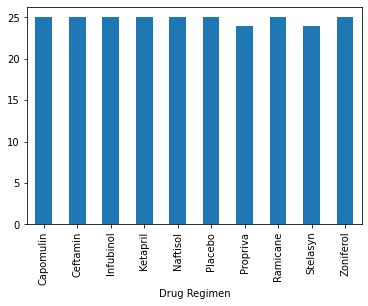

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

num_mice_tested.plot(kind = 'bar')


In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

combined_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


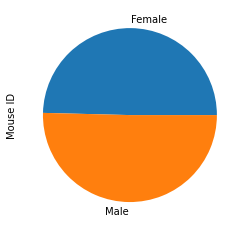

In [59]:
gender_df = combined_results_df.groupby(["Sex"]).nunique()
gender_distro = gender_df["Mouse ID"]

gender_distro.plot.pie()

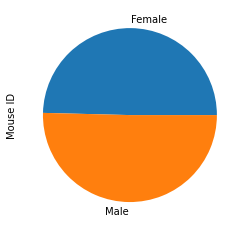

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distro.plot(kind = 'pie')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
